In [1]:
!nvidia-smi

Mon Oct 30 05:04:23 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD

In [3]:
# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Check if Keras is using GPU
print("Keras GPU Available: ", tf.test.is_built_with_cuda())

Num GPUs Available:  1
Keras GPU Available:  True


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load CIFAR-100 data
(train_images, train_labels), (test_images, test_labels) = datasets.cifar100.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Apply data augmentation to the training data
datagen = ImageDataGenerator(
    rotation_range=40,  # Degree range for random rotations
    width_shift_range=0.2,  # Range for random horizontal shifts
    height_shift_range=0.2,  # Range for random vertical shifts
    shear_range=0.2,  # Shear Intensity
    zoom_range=0.2,  # Range for random zoom
    horizontal_flip=True,  # Randomly flip inputs horizontally
    fill_mode='nearest'  # Strategy for filling in newly created pixels
)

datagen.fit(train_images)

In [5]:
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [6]:
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# Create AlexNet model
model = models.Sequential()

# Add layers with increased regularization and batch normalization
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(100, activation='softmax'))


# Compile the model with a lower learning rate and batch normalization
opt = Adam(learning_rate=0.01)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# # Compile the model with a lower learning rate and batch normalization
# opt = SGD(learning_rate=0.01, momentum=0.9)  # Set your desired learning rate and momentum
# model.compile(optimizer=opt,
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])


In [7]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [8]:
batch_size = 64  # Set your desired batch size

# Train the model with the specified batch size
history = model.fit(train_images, train_labels,
                    batch_size=batch_size,
                    epochs=50,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stopping])


model.save('my_cifar100_model.h5')

Epoch 1/50
782/782 [==============================] - 32s 27ms/step - loss: 5.6971 - accuracy: 0.0533 - val_loss: 5.1491 - val_accuracy: 0.0616
Epoch 2/50
782/782 [==============================] - 21s 27ms/step - loss: 5.0270 - accuracy: 0.0822 - val_loss: 5.0376 - val_accuracy: 0.0941
Epoch 3/50
782/782 [==============================] - 21s 27ms/step - loss: 4.9769 - accuracy: 0.1108 - val_loss: 4.9019 - val_accuracy: 0.1486
Epoch 4/50
782/782 [==============================] - 21s 27ms/step - loss: 4.5945 - accuracy: 0.1528 - val_loss: 4.4262 - val_accuracy: 0.1927
Epoch 5/50
782/782 [==============================] - 20s 26ms/step - loss: 4.2574 - accuracy: 0.2047 - val_loss: 4.2585 - val_accuracy: 0.2303
Epoch 6/50
782/782 [==============================] - 21s 27ms/step - loss: 4.0221 - accuracy: 0.2444 - val_loss: 4.1740 - val_accuracy: 0.2592
Epoch 7/50
782/782 [==============================] - 21s 27ms/step - loss: 3.8720 - accuracy: 0.2828 - val_loss: 4.0146 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 - 2s - loss: 3.3900 - accuracy: 0.4274 - 2s/epoch - 5ms/step

Test accuracy: 0.42739999294281006


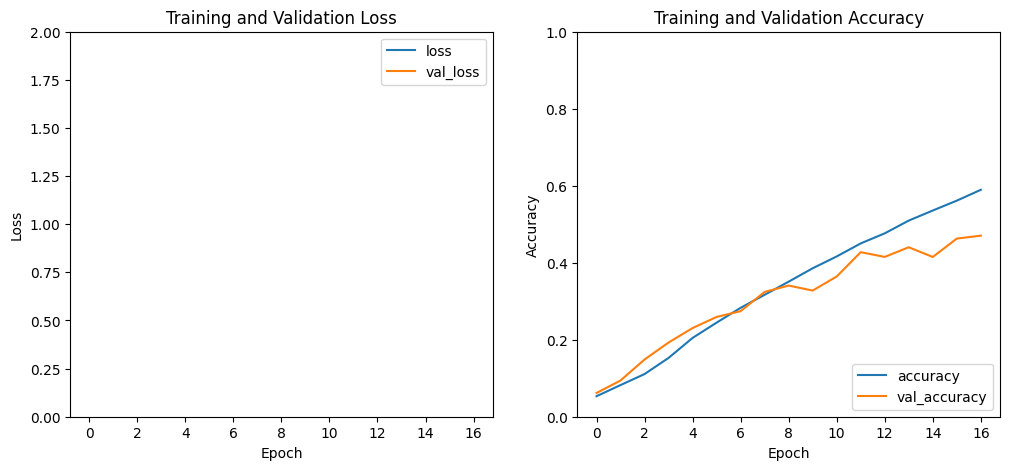

In [9]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 5))

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.ylim([0, 2])  # Adjust the y-axis limits as needed
plt.legend(loc='upper right')

plt.show()


313/313 [==============================] - 2s 4ms/step


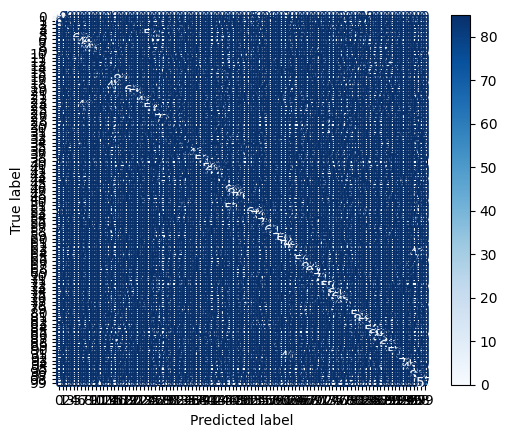

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Predict classes for test images
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Compute confusion matrix
cm = confusion_matrix(test_labels, predicted_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(test_labels))
disp.plot(cmap=plt.cm.Blues)
plt.show()
